# Imports

In [1]:
import pandas as pd 
import numpy as np

### Base com atributos numéricos

In [2]:
# Base tirada de https://archive.ics.uci.edu/ml/datasets/Mushroom


"""
Valores das colunas
0. classes: edible=e, poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

"""


mushroom = pd.read_csv('databases/agaricus-lepiota.csv',
                      header=None, 
                      names=[
                        "classes",
                        "cap-shape",
                        "cap-surface",
                        "cap-color",
                        "bruises?",
                        "odor",
                        "gill-attachment",
                        "gill-spacing",
                        "gill-size",
                        "gill-color",
                        "stalk-shape",
                        "stalk-root",
                        "stalk-surface-above-ring",
                        "stalk-surface-below-ring",
                        "stalk-color-above-ring",
                        "stalk-color-below-ring",
                        "veil-type",
                        "veil-color",
                        "ring-number",
                        "ring-type",
                        "spore-print-color",
                        "population", 
                        "habitat"
                      ])

# Substituindo a string 
# a coluna 11, 'stalk-root' apresenta o missing value = ? 
# mushroom = mushroom.replace({

# })
# mushroom = mushroom.drop(columns=['0', '1'])
mushroom

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushroom.describe()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mushroom.dtypes

classes                     object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Tratando os Nulos da Coluna 'stalk-root'

In [5]:
# Sabemos que apenas a coluna stalk-root possui nulos, então iremos tratá-la especificamente

mushroom = mushroom.replace({"?": np.NaN})


mushroom['stalk-root'] = mushroom['stalk-root'].fillna(mushroom['stalk-root'].value_counts().index[0])

mushroom['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [6]:
atributos_categoricos = [
                        "cap-shape",
                        "cap-surface",
                        "cap-color",
                        "bruises?",
                        "odor",
                        "gill-attachment",
                        "gill-spacing",
                        "gill-size",
                        "gill-color",
                        "stalk-shape",
                        "stalk-root",
                        "stalk-surface-above-ring",
                        "stalk-surface-below-ring",
                        "stalk-color-above-ring",
                        "stalk-color-below-ring",
                        "veil-type",
                        "veil-color",
                        "ring-number",
                        "ring-type",
                        "spore-print-color",
                        "population", 
                        "habitat"
                      ]
mushroom = pd.get_dummies(mushroom, 
                         columns=atributos_categoricos)
mushroom

,classes,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,e,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [7]:
# Usar o get dummies
# from sklearn.preprocessing import OrdinalEncoder
# atributos = [
#                         "cap-shape",
#                         "cap-surface",
#                         "cap-color",
#                         "bruises?",
#                         "odor",
#                         "gill-attachment",
#                         "gill-spacing",
#                         "gill-size",
#                         "gill-color",
#                         "stalk-shape",
#                         "stalk-root",
#                         "stalk-surface-above-ring",
#                         "stalk-surface-below-ring",
#                         "stalk-color-above-ring",
#                         "stalk-color-below-ring",
#                         "veil-type",
#                         "veil-color",
#                         "ring-number",
#                         "ring-type",
#                         "spore-print-color",
#                         "population", 
#                         "habitat"
#                       ]
# enc = OrdinalEncoder()
# enc.fit(mushroom[atributos])
# mushroom[atributos] = enc.transform(mushroom[atributos])
# mushroom

In [8]:
from sklearn.preprocessing import StandardScaler

atributos = mushroom.columns.values.tolist()
# if not reordered:
#     for i in range(2):
#         e = atributos.pop(0)
#         atributos.append(e)
#     atributos

# reordered = True
# tae = tae.reindex(columns=atributos)
# tae


limiar = 1 # O limiar separa o index do que é atributo para o que é a classe
atributos = mushroom.columns[limiar:] # seleciono apenas os atributos

# Agora é possivel aplicar o StandardScaler apenas nos atributos

# mushroom[atributos] = StandardScaler().fit_transform(mushroom[atributos])
# mushroom[atributos]
atributos

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=116)

## Clusterizando a base dos Cogumelos
##### Selecionando o X e y

In [9]:
# Selecionando o X e o y


# X = mushroom[atributos]
X = mushroom.iloc[:, limiar:].values # Atributos do Data Frame do Pandas
y = mushroom.iloc[:, :limiar].values # Classes do Data Frame do Pandas

y = np.squeeze(y) # Converter em um unico Array quando usar o dataFrame do Pandas

y_unique = np.unique(y)

# Atualizando o eixo Y
for i in range(len(y_unique)):
    y = [i if y_unique[i] == e else e for e in y]
y = np.array(y)

y_unique # Valores unicos de classes

y_unique_n = np.unique(y) # Original
print("Equivalencia: ", dict(zip(y_unique, y_unique_n)))

Equivalencia:  {'e': 0, 'p': 1}


##### Exemplos de Algoritmos para cálculos de distâncias

In [10]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity


eucl = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'euclidean')

manh = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'manhattan')

ass_cos = cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))

print("Euclidiano: ", eucl)
print("Manhattan: ", manh)
print("Assimilaridade do Cosseno: ", ass_cos)

Euclidiano:  [[3.74165739]]
Manhattan:  [[14.]]
Assimilaridade do Cosseno:  [[0.68181818]]


In [11]:
#pd.DataFrame(pairwise_distances(X, metric='euclidean'))


##### PCA

Projecting 116-dimensional data to 2D


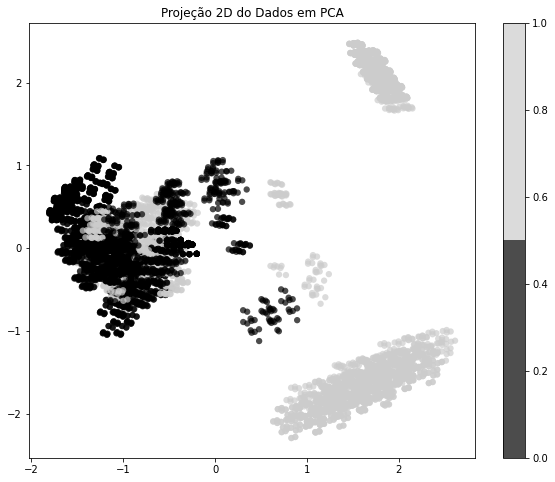

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

def plot_g(pyplot, title, colors, n_classes):
    pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, 
             edgecolor='none', alpha=0.7, s=40,
             cmap=plt.cm.get_cmap('nipy_spectral', n_classes)
           )
    pyplot.colorbar()
    pyplot.title(title)

plt.figure(figsize=(10, 8)) # Tamanho da Figura
plot_g(plt, 'Projeção 2D do Dados em PCA', y, len(y_unique))
plt.show()


##### KMeans com a base original e com o PCA

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(y_unique)).fit(X)
labels = kmeans.labels_

kmeans_PCA = KMeans(n_clusters=len(y_unique)).fit(X_reduced)
labels_PCA = kmeans_PCA.labels_


##### Plotando os Gráficos 

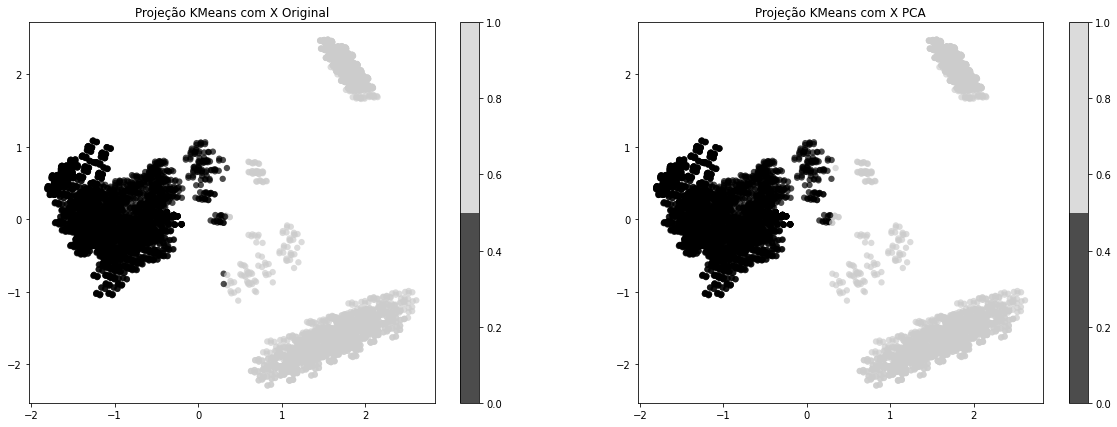

In [14]:

plt.figure(figsize=(10*2, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X Original')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_PCA, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X PCA')

plt.show()

##### Comparando o KMeans, KMeans PCA e o y Original

In [15]:
print("Comparação: ")

unique, counts = np.unique(labels, return_counts=True) # KMeans
print("KMeans X: " , dict(zip(unique, counts)))

unique, counts = np.unique(labels_PCA, return_counts=True) # KMeans PCA
print("KM.. PCA: ", dict(zip(unique, counts)))

unique, counts = np.unique(y, return_counts=True) # Original
print("Original: ", dict(zip(unique, counts)))


Comparação: 
KMeans X:  {0: 4974, 1: 3150}
KM.. PCA:  {0: 4966, 1: 3158}
Original:  {0: 4208, 1: 3916}


##### Usando as metricas de avaliação para comparar os resultados com e sem o PCA

##### Sem PCA

In [16]:
from sklearn import metrics
from sklearn.metrics.cluster import v_measure_score

ari = metrics.adjusted_rand_score(y, labels)
silh = metrics.silhouette_score(X, labels, metric='euclidean')
ami = metrics.adjusted_mutual_info_score(y, labels)
vm = v_measure_score(y, labels)

##### Com PCA

In [17]:
ari_pca = metrics.adjusted_rand_score(y, labels_PCA)
silh_pca = metrics.silhouette_score(X_reduced, labels, metric='euclidean')
ami_pca = metrics.adjusted_mutual_info_score(y, labels_PCA)
vm_pca = v_measure_score(y, labels_PCA)

##### Tabela de comparação dos resultados

In [18]:
data = {
# "Base de dados": [], 
"Pré-processamento":['Com PCA', 'Sem PCA'], 
"SILHUETA":[silh_pca, silh], 
"ARI": [ari_pca, ari], 
"AMI": [ami_pca, ami], 
"V-M":[vm_pca, vm]
}

pd.DataFrame(data)

,Pré-processamento,SILHUETA,ARI,AMI,V-M
0,Com PCA,0.612536,0.615897,0.564087,0.564127
1,Sem PCA,0.161799,0.618992,0.569904,0.569943
